![alternative text](../../data/knn_chatgpt.png)


In [37]:
import torch
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from collections import Counter
from matplotlib.pylab import plt

In [71]:
# Load the Iris dataset
X, y = make_classification(n_samples=300, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=2, random_state=2)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

# Convert labels to PyTorch tensors
y_train_tensor = torch.tensor(y_train)
y_test_tensor = torch.tensor(y_test)


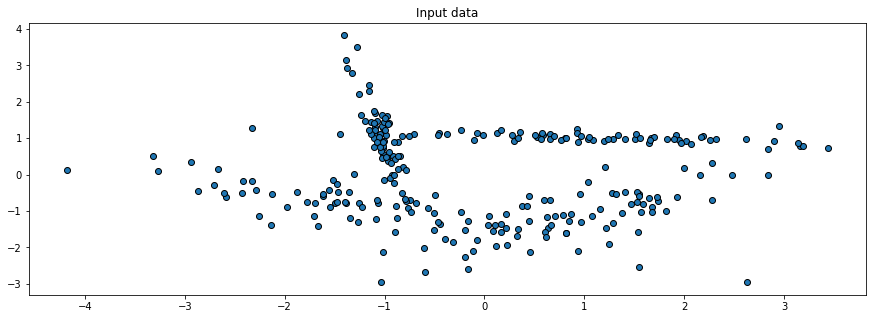

In [72]:
plt.figure(figsize=(15,5))
plt.scatter(X_train_tensor[:, 0], X_train_tensor[:, 1],  edgecolors='k', cmap=plt.cm.Paired)
plt.title("Input data")
plt.show()



KNN algorithm

In [73]:
def knn(X_train, y_train, x_query, k):
    distances = torch.norm(X_train - x_query, dim=1)  # Euclidean distance
    indices = distances.argsort()[:k]  # Indices of the k nearest neighbors
    nearest_labels = y_train[indices]
    most_common_label = torch.bincount(nearest_labels).argmax()
    return most_common_label

# Visualizing K-NN decision Boundary

In [74]:
# Create a mesh grid of data for viz
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = torch.meshgrid(torch.linspace(x_min, x_max, 500), torch.linspace(y_min, y_max, 500))
mesh_data = torch.cat((xx.flatten().unsqueeze(1), yy.flatten().unsqueeze(1)), dim=1)

print(xx.shape)
print(mesh_data.shape)

torch.Size([500, 500])
torch.Size([250000, 2])


In [81]:
# Classify each point in the meshgrid using KNN
k = 15 # number of nn , smaller k more overfitting 

mesh_labels = []
# looping over all possible values 
for point in mesh_data:
    predicted_label = knn(X_train_tensor, y_train_tensor, point, k)
    mesh_labels.append(predicted_label)
    
mesh_labels = torch.tensor(mesh_labels)

# Convert mesh labels to a grid 500x500
mesh_labels = mesh_labels.reshape(xx.shape)

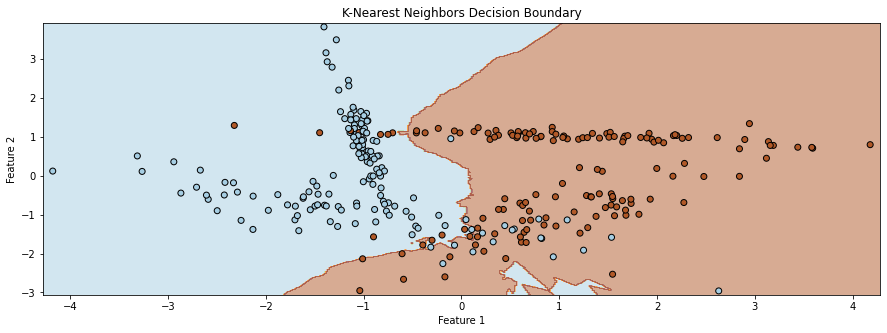

In [82]:
# Plot the decision boundary and data points
plt.figure(figsize=(15,5))
plt.contourf(xx, yy, mesh_labels, alpha=0.5, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Nearest Neighbors Decision Boundary')
plt.show()